In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.dates import DateFormatter

In [2]:
# Task 1: Team Performance Analysis
# 1.1: Data Preprocessing
wc_data = pd.read_csv("CWC23_all_innings.csv")

In [3]:
# Display the first few rows of the dataset
print(wc_data.head())

  team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   

   wicketball_prob  runs_per_ball      opposition     ground start_date  \
0             0.05       0.750000  v South Africa    Chennai  27-Oct-23   
1             0.05       0.750000         v India    Lucknow  29-Oct-23   
2             0.05       0.800000       v England  Ahmedabad   5-Oct-23   
3             0.05       0.816667    v Bangladesh    Chennai  13-Oct-23   
4             0.05       0.816667      v Pakistan    Chennai  23-Oct-23   

   overs  mdns  econ  inns  4s  6s  sr  not_out  mins  
0   10.0   0.0   4.5     2 NaN NaN NaN      NaN   NaN  
1   10.0   2.0   4.5     1 N

In [4]:
# Understand the structure of the dataset
print(wc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [5]:
# For Batsmen: Fill null values in columns 'overs', 'mdns', 'econ', 'inns', and 'wkts' with zeros
bat_null_cols = ['overs', 'mdns', 'econ', 'inns', 'wkts']
wc_data.loc[wc_data['bat_or_bowl'] == 'bat', bat_null_cols] = wc_data.loc[wc_data['bat_or_bowl'] == 'bat', bat_null_cols].fillna(0)

# For Bowlers: Fill null values in columns '4s', '6s', 'sr', 'not_out', and 'mins' with zeros
bowl_null_cols = ['4s', '6s', 'sr', 'not_out', 'mins']
wc_data.loc[wc_data['bat_or_bowl'] == 'bowl', bowl_null_cols] = wc_data.loc[wc_data['bat_or_bowl'] == 'bowl', bowl_null_cols].fillna(0)

wc_data = wc_data[~wc_data['start_date'].str.startswith(('15-Nov-23', '16-Nov-23'))]

In [6]:
# Calculating the number of matches played by each team
matches_played_by_team = wc_data.groupby('team')['opposition'].nunique()
print(matches_played_by_team)

team
AFG     9
AUS     9
BAN     9
ENG     9
IND     9
NED    10
NZ      9
PAK     9
SA      9
SL      9
Name: opposition, dtype: int64


In [7]:
# Displaying the data for a specific index where the error was found
print(wc_data.loc[1339])

team                         NED
player             V Kohli (IND)
bat_or_bowl                 bowl
bb_bf                         18
runs                          13
wkts                         1.0
wicketball_prob         0.055556
runs_per_ball           0.722222
opposition         v Netherlands
ground                 Bengaluru
start_date             12-Nov-23
overs                        3.0
mdns                         0.0
econ                        4.33
inns                           2
4s                           0.0
6s                           0.0
sr                           0.0
not_out                      0.0
mins                         0.0
Name: 1339, dtype: object


In [8]:
# Correcting the team entry for player Virat Kohli from NED to IND
wc_data.loc[wc_data.index == 1339, 'team'] = 'IND'

# Recalculating the number of matches played by each team after the correction
matches_played_by_team = wc_data.groupby('team')['opposition'].nunique()
print(matches_played_by_team)

# The correction ensures that each team's match count is accurate

team
AFG    9
AUS    9
BAN    9
ENG    9
IND    9
NED    9
NZ     9
PAK    9
SA     9
SL     9
Name: opposition, dtype: int64


In [9]:
# Group the data by 'team'
team_grouped = wc_data.groupby('team')

# Initialize an empty dictionary to store the total players for each team
total_players_per_team = {}

# Loop through each unique team and count the unique players
for team_name, team_data in team_grouped:
    team_players = team_data['player'].nunique()
    total_players_per_team[team_name] = team_players

# Display the total players in each team
for team, total_players in total_players_per_team.items():
    print(f"Team: {team} | Total Players: {total_players}")

Team: AFG | Total Players: 13
Team: AUS | Total Players: 15
Team: BAN | Total Players: 15
Team: ENG | Total Players: 15
Team: IND | Total Players: 15
Team: NED | Total Players: 15
Team: NZ | Total Players: 15
Team: PAK | Total Players: 15
Team: SA | Total Players: 15
Team: SL | Total Players: 18


In [10]:
# 1.2: Team-wise Performance Metrics

# Calculate total runs scored by each team
total_runs = wc_data[wc_data['bat_or_bowl'] == 'bat'].groupby('team')['runs'].sum().sort_values(ascending=False)

# Calculate total wickets taken by each team
total_wickets = wc_data[wc_data['bat_or_bowl'] == 'bowl'].groupby('team')['wkts'].sum().sort_values(ascending=False)

# Calculate batting average for each team (runs scored divided by 9 players)
batting_avg = (wc_data[wc_data['bat_or_bowl'] == 'bat'].groupby('team')['runs'].sum() / 9).sort_values(ascending=False)

# Calculate bowling average for each team (balls faced divided by wickets taken)
bowling_avg = (wc_data[wc_data['bat_or_bowl'] == 'bowl'].groupby('team')['bb_bf'].sum() / total_wickets).sort_values(ascending=True)

# Create DataFrame directly from dictionaries
team_performance_metrics = pd.DataFrame({
    'Total Runs': total_runs,
    'Total Wickets': total_wickets,
    'Batting Average': batting_avg,
    'Bowling Average': bowling_avg
})

# Print the combined DataFrame
print(team_performance_metrics)

      Total Runs  Total Wickets  Batting Average  Bowling Average
team                                                             
AFG         1990           53.0       221.111111        45.339623
AUS         2524           67.0       280.444444        35.776119
BAN         1944           51.0       216.000000        46.862745
ENG         2135           65.0       237.222222        36.046154
IND         2421           85.0       269.000000        26.247059
NED         1728           62.0       192.000000        40.064516
NZ          2414           67.0       268.222222        35.880597
PAK         2220           65.0       246.666667        38.123077
SA          2572           81.0       285.777778        28.111111
SL          1942           50.0       215.777778        45.180000


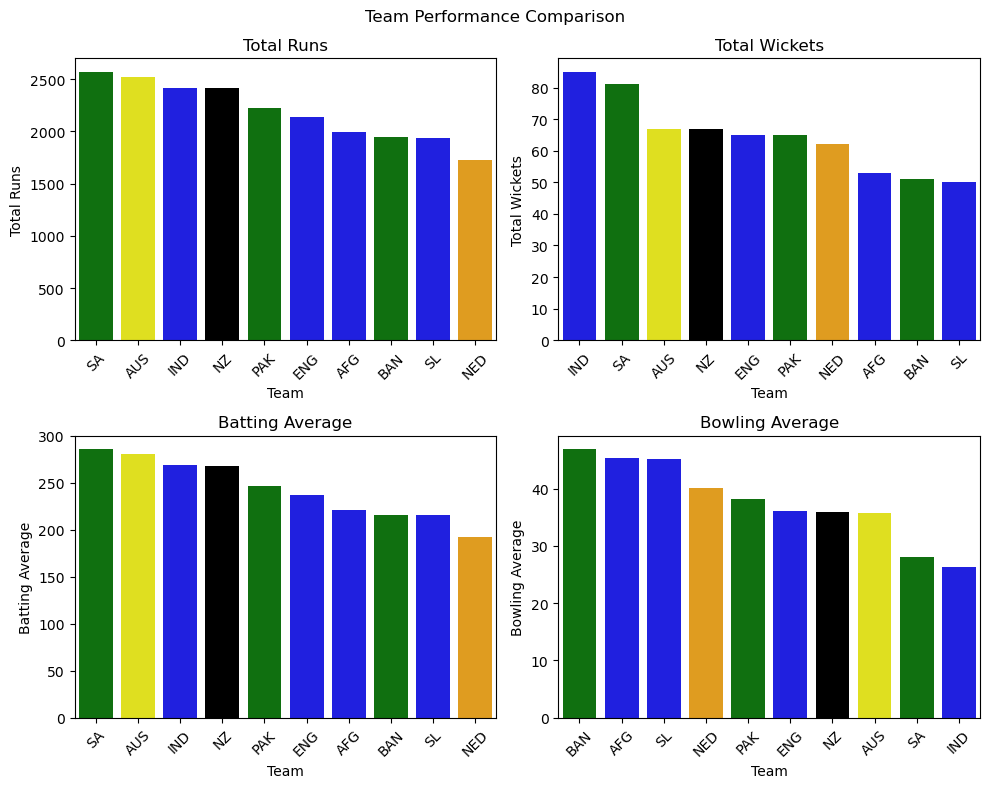

In [11]:
# 1.3: Visualization for Team Performance
# Define the colors for each team as per your specification
team_colors = {
    'IND': 'blue',
    'AUS': 'yellow',
    'PAK': 'green',
    'SA': 'green',
    'NZ': 'black',
    'SL': 'blue',
    'BAN': 'green',
    'NED': 'orange',
    'AFG': 'blue',
    'ENG': 'blue'
}

# Define the metrics you want to visualize
metrics_to_visualize = ['Total Runs', 'Total Wickets', 'Batting Average', 'Bowling Average']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Team Performance Comparison')

for i, metric in enumerate(metrics_to_visualize):
    ax = axes[i // 2, i % 2]  # Get the current axis
    sorted_teams = team_performance_metrics[metric].sort_values(ascending=False).index
    team_values = team_performance_metrics.loc[sorted_teams, metric]
    team_colors_list = [team_colors[team] for team in sorted_teams]
    
    # Use Seaborn's barplot for the current metric with hue and legend settings
    sns.barplot(x=sorted_teams, y=team_values, hue=sorted_teams, palette=team_colors_list, ax=ax, dodge=False)
    ax.set_title(metric)
    ax.set_xlabel('Team')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [12]:
# Task 2: Player Performance Analysis
# 2.1: Data Preparation for Players and Identify Leading Players

# Calculate Batting Statistics
batting_stats = wc_data[wc_data['bat_or_bowl'] == 'bat'].groupby('player').agg({
    'runs': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'not_out': 'sum',
    'mins': 'sum',
    'bb_bf': 'sum'
})

# Calculate Bowling Statistics
bowling_stats = wc_data[wc_data['bat_or_bowl'] == 'bowl'].groupby('player').agg({
    'wkts': 'sum',
    'mdns': 'sum',
    'overs': 'sum',  # Assuming 'overs' represents the total overs bowled by the player
    'runs': 'sum'
})

# Calculate Additional Batting Metrics
batting_stats['batting_average'] = batting_stats['runs'] / (batting_stats['not_out'] + 1)
batting_stats['strike_rate'] = (batting_stats['runs'] / batting_stats['bb_bf']) * 100

# Calculate Additional Bowling Metrics
bowling_stats['bowling_average'] = bowling_stats['runs'] / bowling_stats['wkts']
# Assuming 'bb_bf' in bowling_stats is the total balls bowled by the player
bowling_stats['economy_rate'] = (bowling_stats['runs'] / (bowling_stats['overs'])).round(2)

# Merge Batting and Bowling Statistics on 'player' as index
player_stats = pd.merge(batting_stats, bowling_stats, on='player', how='outer')

# Sort the DataFrame by 'runs' (total runs) in descending order and retrieve the top 10 players
top_10_runs = player_stats.sort_values(by='runs_x', ascending=False).head(10)

# Display the top 10 players based on total runs with specific batting statistics
print("Top 10 Players by Total Runs:")
print(top_10_runs[['runs_x', '4s', '6s', 'batting_average', 'strike_rate']])

# Sort the DataFrame by 'wkts' (total wickets) in descending order and retrieve the top 10 players
top_10_wickets = player_stats.sort_values(by='wkts', ascending=False).head(10)

# Display the top 10 players based on total wickets with specific bowling statistics
print("\nTop 10 Players by Total Wickets:")
print(top_10_wickets[['wkts', 'overs', 'bowling_average', 'economy_rate']])

Top 10 Players by Total Runs:
                        runs_x    4s    6s  batting_average  strike_rate
player                                                                  
V Kohli (IND)            594.0  55.0   7.0           148.50    88.524590
Q de Kock (SA)           591.0  57.0  21.0           591.00   109.242144
R Ravindra (NZ)          565.0  52.0  17.0           282.50   108.445298
RG Sharma (IND)          503.0  58.0  24.0           503.00   121.497585
DA Warner (AUS)          499.0  48.0  20.0           499.00   105.496829
HE van der Dussen (SA)   442.0  39.0   8.0           221.00    88.577154
MR Marsh (AUS)           426.0  42.0  20.0           213.00   109.511568
SS Iyer (IND)            421.0  32.0  16.0           105.25   106.582278
DJ Mitchell (NZ)         418.0  39.0  15.0           209.00   110.582011
DJ Malan (ENG)           404.0  50.0   9.0           404.00   101.000000

Top 10 Players by Total Wickets:
                           wkts  overs  bowling_average  eco

C:\Users\cloud\AppData\Local\Temp\ipykernel_14216\1637267087.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runs_x', y=top_10_runs.index,
C:\Users\cloud\AppData\Local\Temp\ipykernel_14216\1637267087.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wkts', y=top_10_wickets.index,


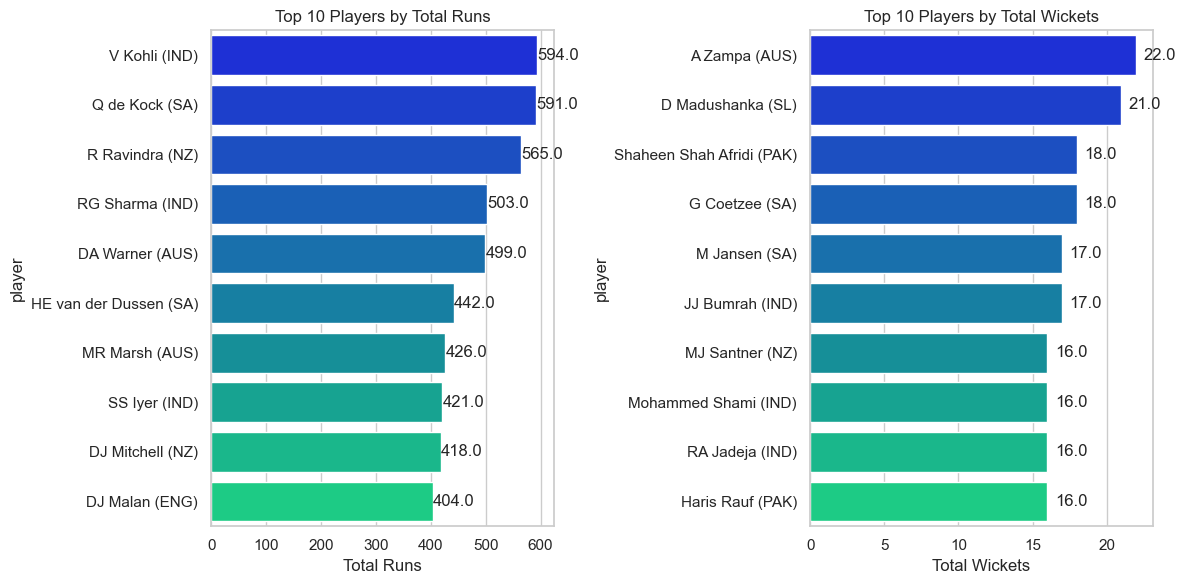

In [32]:
# 2.2: Visualize Player Performance
# Top 10 players by Runs and Wickets

# Set up the style for seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for runs and wickets
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for top 10 players by total runs
sns.barplot(x='runs_x', y=top_10_runs.index,
            data=top_10_runs.reset_index(), palette='winter', ax=axes[0], legend=False)
axes[0].set_xlabel('Total Runs')
axes[0].set_title('Top 10 Players by Total Runs')

# Annotate each bar with the runs scored
for i, v in enumerate(top_10_runs['runs_x']):
    axes[0].text(v + 0.5, i, str(v), va='center')

# Plot for top 10 players by total wickets
sns.barplot(x='wkts', y=top_10_wickets.index,
            data=top_10_wickets.reset_index(), palette='winter', ax=axes[1], legend=False)
axes[1].set_xlabel('Total Wickets')
axes[1].set_title('Top 10 Players by Total Wickets')

# Annotate each bar with the wickets taken
for i, v in enumerate(top_10_wickets['wkts']):
    axes[1].text(v + 0.5, i, str(v), va='center')

plt.tight_layout()
plt.show()

C:\Users\cloud\AppData\Local\Temp\ipykernel_14216\1400702839.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Centuries', y='Player', data=centuries_by_player, palette='winter', ax=axes[0])
C:\Users\cloud\AppData\Local\Temp\ipykernel_14216\1400702839.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fifties', y='Player', data=fifties_by_player, palette='winter', ax=axes[1])


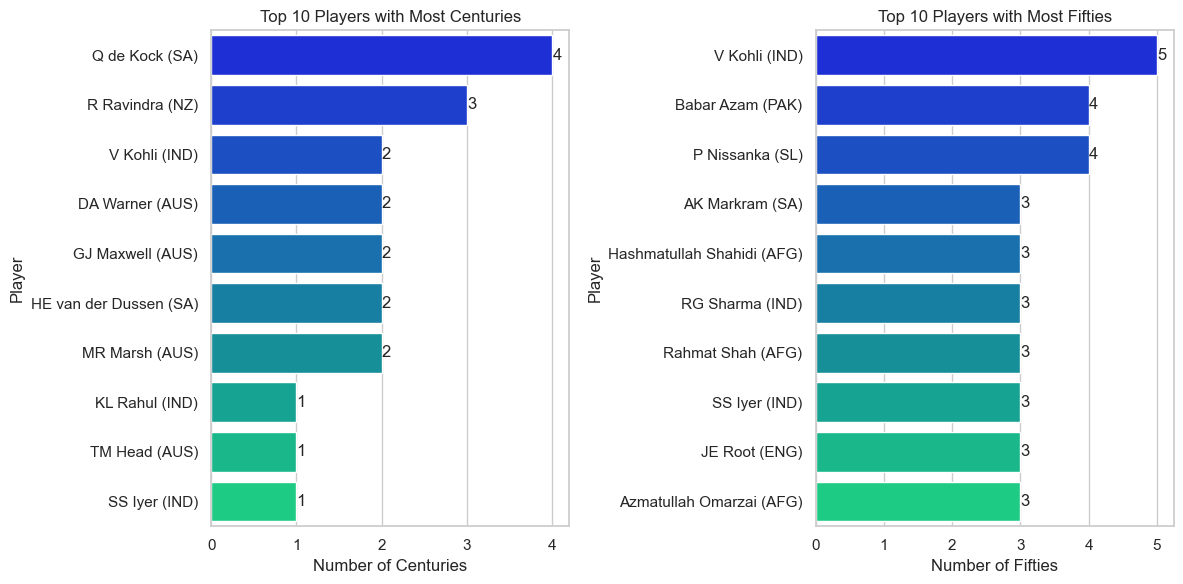

In [26]:
# Top 10 players by 100s and 50s

# Set up the style for seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for runs and wickets
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Filter for batting data
batting_data = wc_data[wc_data['bat_or_bowl'] == 'bat']

# Filter innings where the player scored 100 runs or more
century_per_player = batting_data[batting_data['runs'] >= 100]

# Count the number of centuries scored by each player
centuries_by_player = century_per_player.groupby('player')['runs'].count().reset_index()
centuries_by_player.columns = ['Player', 'Centuries']
centuries_by_player = centuries_by_player.sort_values(by='Centuries', ascending=False).head(10)

# Visualize top 10 players with most centuries
sns.barplot(x='Centuries', y='Player', data=centuries_by_player, palette='winter', ax=axes[0])
axes[0].set_xlabel('Number of Centuries')
axes[0].set_ylabel('Player')
axes[0].set_title('Top 10 Players with Most Centuries')

# Annotate each bar with the runs scored
for i, v in enumerate(centuries_by_player['Centuries']):
    axes[0].text(v, i, str(v), va='center')

# Filter innings where the player scored between 50 and 99 runs (inclusive)
fifty_per_player = batting_data[(batting_data['runs'] >= 50) & (batting_data['runs'] < 100)]

# Count the number of fifties scored by each player
fifties_by_player = fifty_per_player.groupby('player')['runs'].count().reset_index()
fifties_by_player.columns = ['Player', 'Fifties']
fifties_by_player = fifties_by_player.sort_values(by='Fifties', ascending=False).head(10)

# Visualize top 10 players with most fifties
sns.barplot(x='Fifties', y='Player', data=fifties_by_player, palette='winter', ax=axes[1])
axes[1].set_xlabel('Number of Fifties')
axes[1].set_ylabel('Player')
axes[1].set_title('Top 10 Players with Most Fifties')

# Annotate each bar with the runs scored
for i, v in enumerate(fifties_by_player['Fifties']):
    axes[1].text(v, i, str(v), va='center')

plt.tight_layout()
plt.show()

C:\Users\cloud\AppData\Local\Temp\ipykernel_14216\2332978788.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runs', y='player', data=top_10_run_scorers, palette='winter', ax=axes[0])
C:\Users\cloud\AppData\Local\Temp\ipykernel_14216\2332978788.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wkts', y='player', data=top_wicket_takers, palette='winter', ax=axes[1])


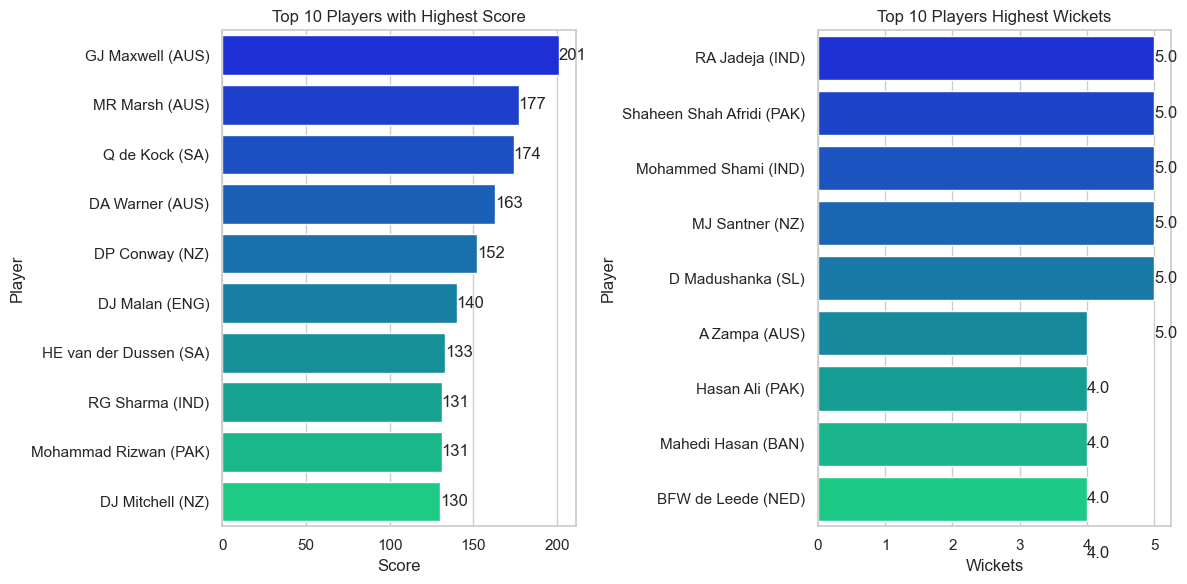

In [36]:
# Top 10 players by 100s and 50s

# Set up the style for seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for runs and wickets
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

top_10_run_scorers = wc_data[['player', 'runs']].sort_values(by='runs', ascending=False).head(10)

# Visualize top 10 run scorers in a single match
sns.barplot(x='runs', y='player', data=top_10_run_scorers, palette='winter', ax=axes[0])
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Player')
axes[0].set_title('Top 10 Players with Highest Score')

# Annotate each bar with the runs scored
for i, v in enumerate(top_10_run_scorers['runs']):
    axes[0].text(v, i, str(v), va='center')

top_wicket_takers = wc_data[['player', 'wkts', 'opposition']].sort_values(by='wkts', ascending=False).head(10)

# Visualize top 10 wicket takers in a single match
sns.barplot(x='wkts', y='player', data=top_wicket_takers, palette='winter', ax=axes[1])
axes[1].set_xlabel('Wickets')
axes[1].set_ylabel('Player')
axes[1].set_title('Top 10 Players Highest Wickets')

# Annotate each bar with the runs scored
for i, v in enumerate(top_wicket_takers['wkts']):
    axes[1].text(v, i, str(v), va='center')

plt.tight_layout()
plt.show()

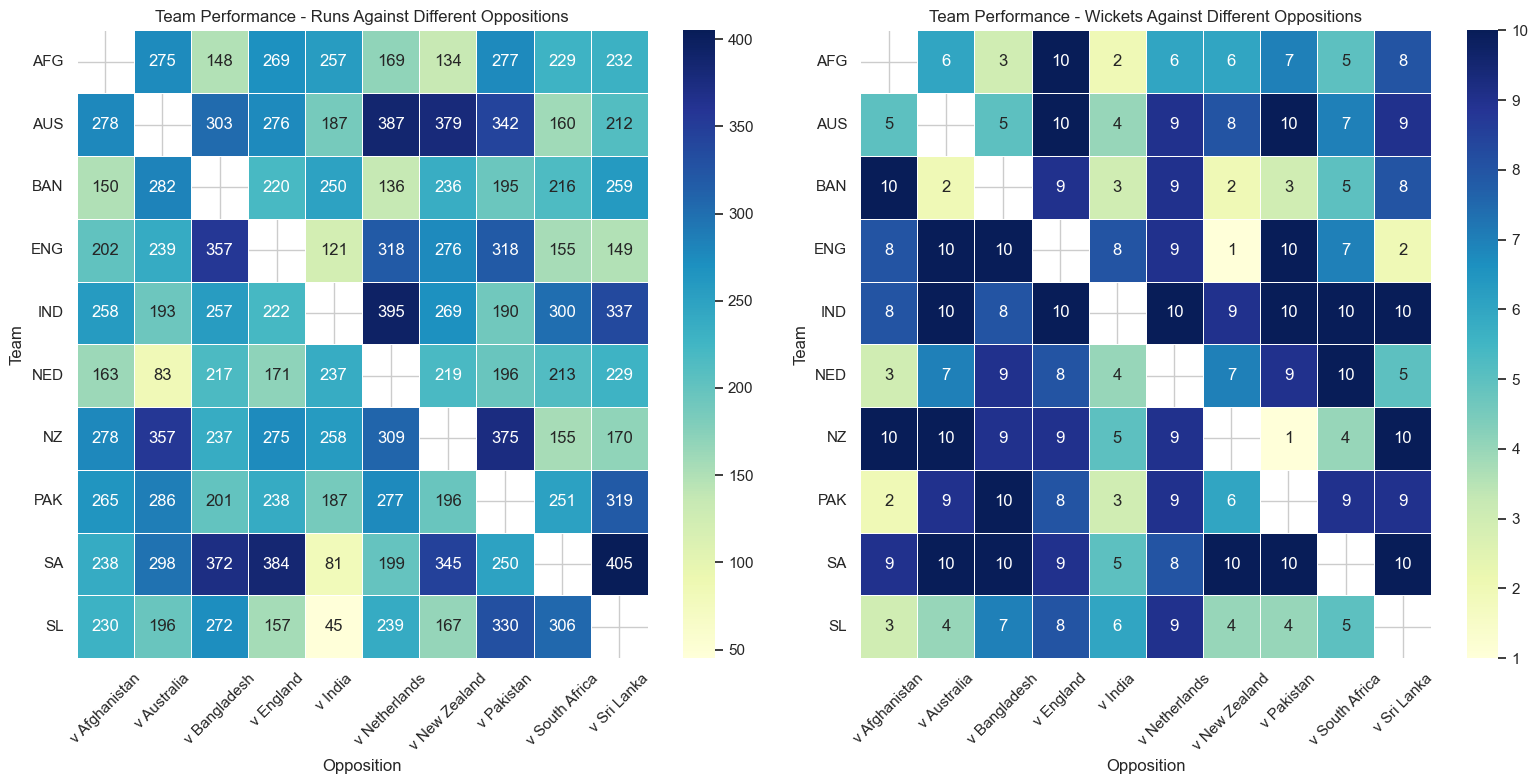

In [16]:
# Task 3: Opposition and Ground Analysis
# 3.1: Performance Against Opposition

# Grouping data by team and opposition, calculating total runs scored or wickets taken
team_runs_performance = wc_data[wc_data['bat_or_bowl'] == 'bat'].groupby(['team', 'opposition']).agg({'runs': 'sum'}).reset_index()
team_wickets_performance = wc_data[wc_data['bat_or_bowl'] == 'bowl'].groupby(['team', 'opposition']).agg({'wkts': 'sum'}).reset_index()

# Create pivot tables for visualization
runs_heatmap_data = team_runs_performance.pivot(index='team', columns='opposition', values='runs')
wickets_heatmap_data = team_wickets_performance.pivot(index='team', columns='opposition', values='wkts')

# Create subplots for both heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot runs heatmap
sns.heatmap(runs_heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, ax=axes[0])
axes[0].set_title('Team Performance - Runs Against Different Oppositions')
axes[0].set_xlabel('Opposition')
axes[0].set_ylabel('Team')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# Plot wickets heatmap
sns.heatmap(wickets_heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, ax=axes[1])
axes[1].set_title('Team Performance - Wickets Against Different Oppositions')
axes[1].set_xlabel('Opposition')
axes[1].set_ylabel('Team')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

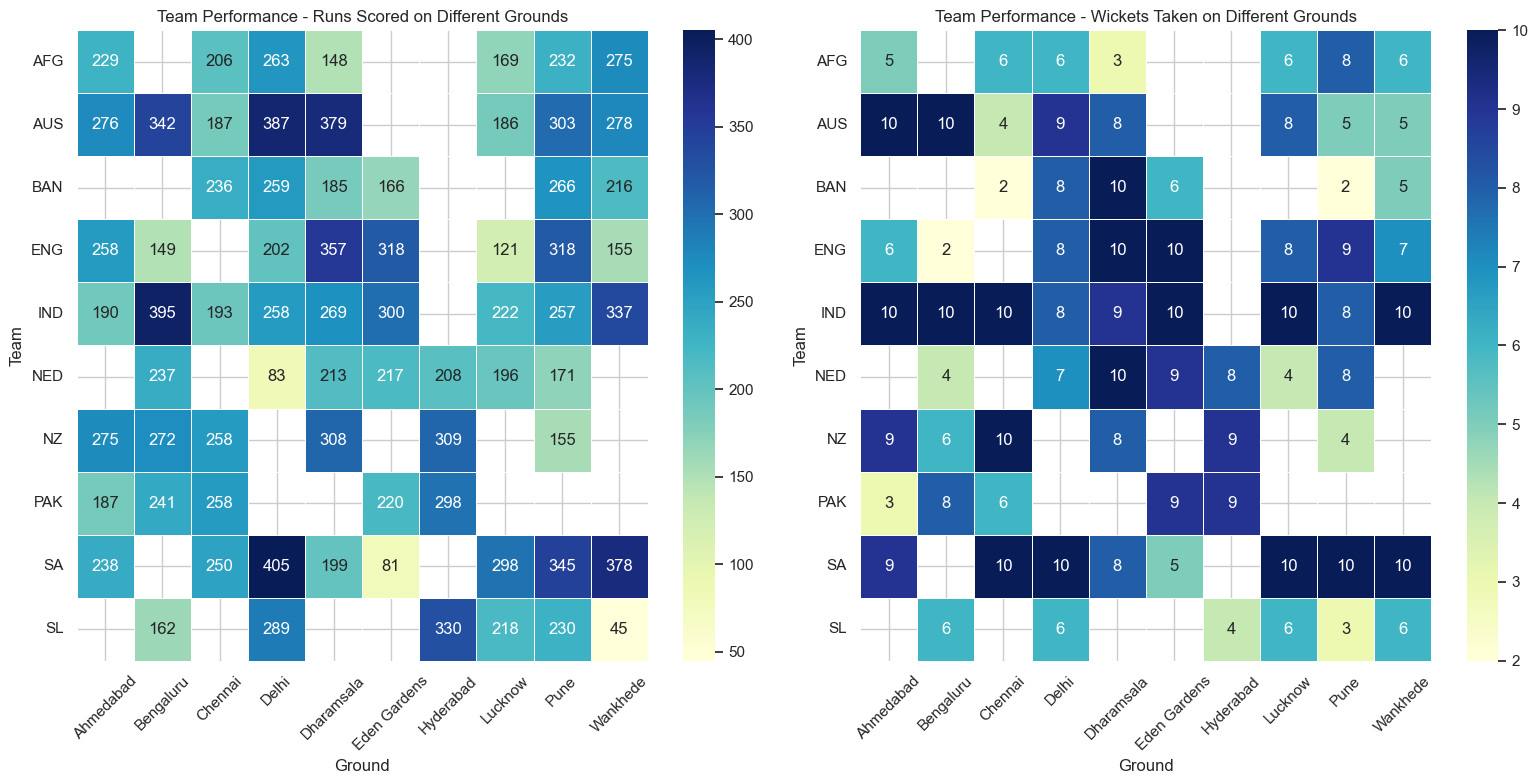

In [17]:
# 3.2: Performance Against Cricket Ground

# Grouping data by team and ground, calculating total runs scored or wickets taken
team_runs_ground = wc_data[wc_data['bat_or_bowl'] == 'bat'].groupby(['team', 'ground', 'start_date'])['runs'].sum().reset_index()
team_wickets_ground = wc_data[wc_data['bat_or_bowl'] == 'bowl'].groupby(['team', 'ground', 'start_date'])['wkts'].sum().reset_index()

team_runs_ground = team_runs_ground.groupby(['team', 'ground'])[['runs']].mean().reset_index()
team_runs_ground['runs'] = round(team_runs_ground['runs'])
team_wickets_ground = team_wickets_ground.groupby(['team', 'ground'])[['wkts']].mean().reset_index()
team_wickets_ground['wkts'] = round(team_wickets_ground['wkts'])

# Create pivot tables for visualization
runs_ground_heatmap = team_runs_ground.pivot(index='team', columns='ground', values='runs')
wickets_ground_heatmap = team_wickets_ground.pivot(index='team', columns='ground', values='wkts')

# Create subplots for both heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot runs heatmap by ground
sns.heatmap(runs_ground_heatmap, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, ax=axes[0])
axes[0].set_title('Team Performance - Runs Scored on Different Grounds')
axes[0].set_xlabel('Ground')
axes[0].set_ylabel('Team')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# Plot wickets heatmap by ground
sns.heatmap(wickets_ground_heatmap, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, ax=axes[1])
axes[1].set_title('Team Performance - Wickets Taken on Different Grounds')
axes[1].set_xlabel('Ground')
axes[1].set_ylabel('Team')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

In [18]:
# Task 4: Temporal Analysis
# 4.1:
# Runs Scored Over Time: Plotting the runs scored by players over different matches can show their performance trends.
# Strike Rate Variation: Analyze the strike rates of players over time to identify periods of high or low performance.
# Boundary Counts (4s and 6s): Track the number of boundaries hit (4s and 6s) by players over different matches.

In [19]:
# Get list of players by team
def get_players_by_team(team_name, data):
    team_data = data[data['team'] == team_name]
    players_list = list(set(team_data['player']))
    
    return players_list
    
# Teams: AFG, AUS, BAN, ENG, IND, NED, NZ, PAK, SA, SL
team_name = 'AUS'  # Replace this with any team name you want to retrieve players for
players = get_players_by_team(team_name, wc_data)
print(f'{team_name} Team Squad:\n')
for player in players:
    print(player)

AUS Team Squad:

A Zampa (AUS)
SPD Smith (AUS)
TM Head (AUS)
DA Warner (AUS)
M Labuschagne (AUS)
PJ Cummins (AUS)
MR Marsh (AUS)
JP Inglis (AUS)
SA Abbott (AUS)
GJ Maxwell (AUS)
AT Carey (AUS)
MP Stoinis (AUS)
JR Hazlewood (AUS)
MA Starc (AUS)
C Green (AUS)


C:\Users\cloud\AppData\Local\Temp\ipykernel_14216\3926372625.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  batsmen['start_date'] = pd.to_datetime(batsmen['start_date'])


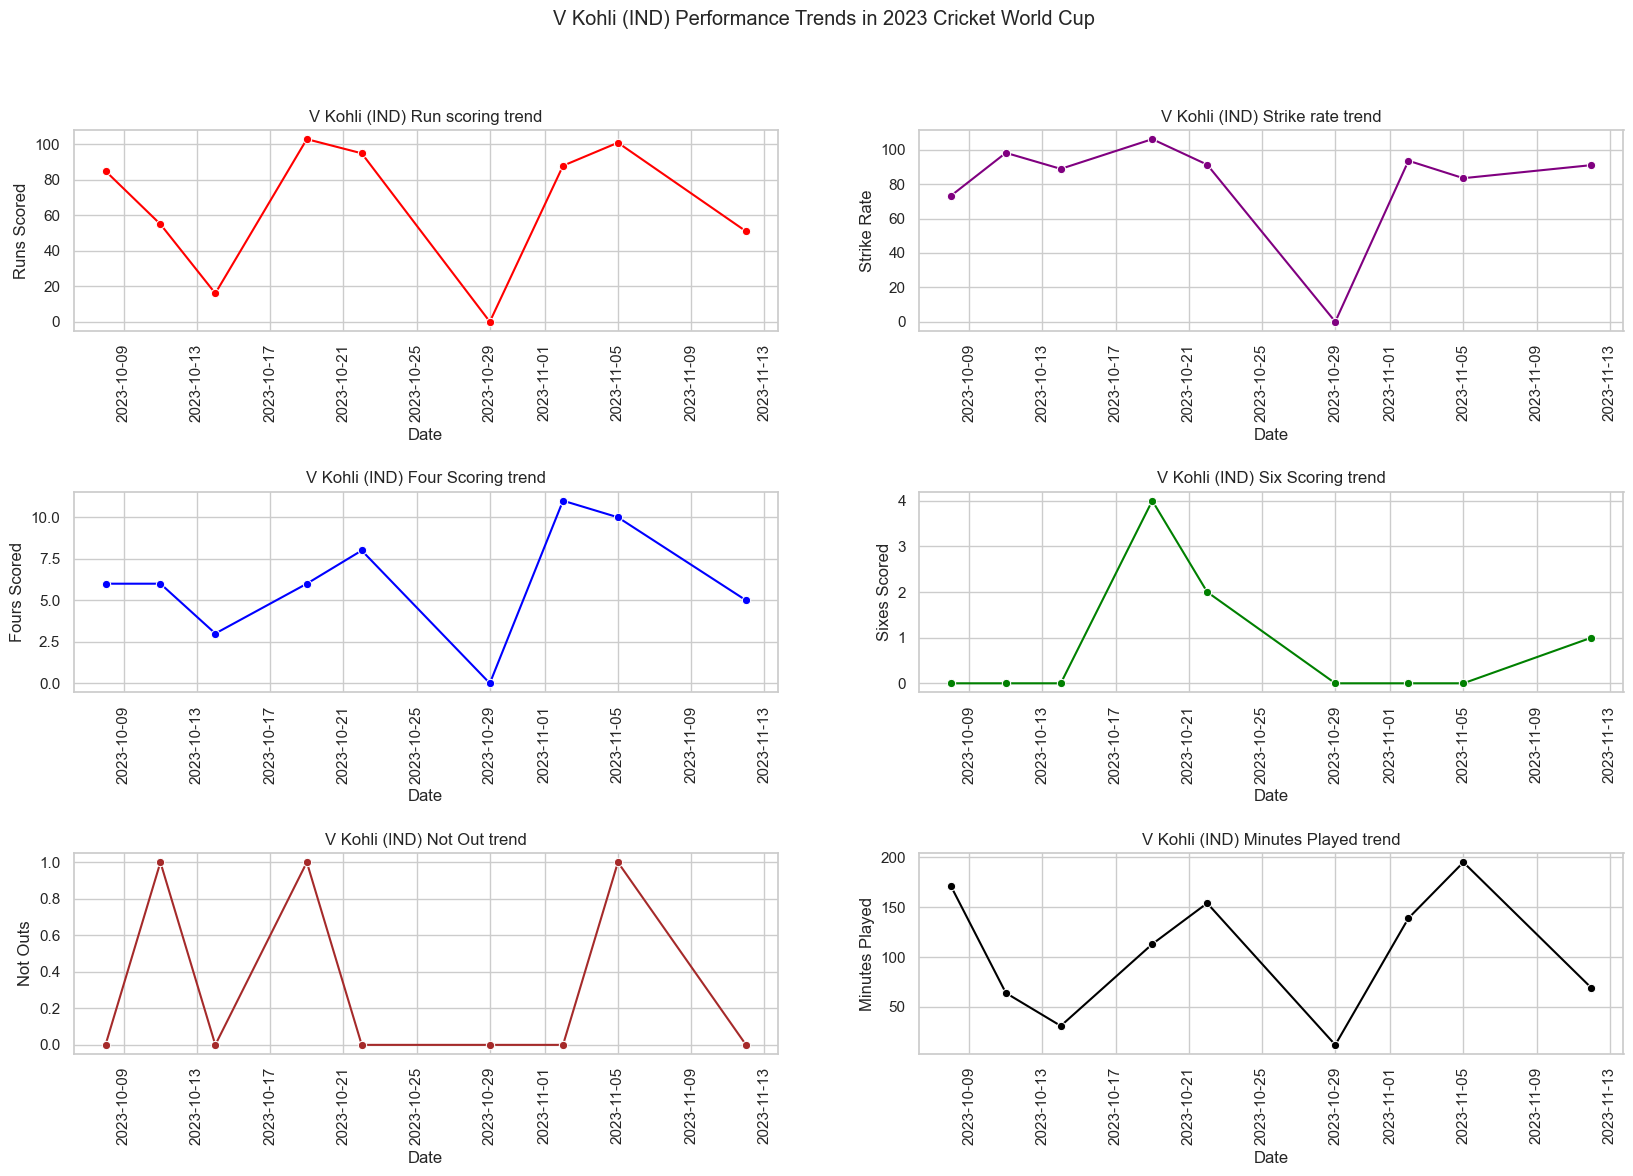

In [20]:
def plot_player_batting_performance(wc_data, team_name, player_name):
    """
    Plots the batting performance trends of a player in a specified team during a World Cup tournament.

    Parameters:
    - wc_data (DataFrame): DataFrame containing World Cup match data.
    - team_name (str): Name of the team (e.g., 'IND' for India).
    - player_name (str): Name of the player to plot batting performance for.

    Returns:
    - None: Displays a plot showing the batting performance trends (Runs Scored, Strike Rate, Fours, Sixes) of the specified player.
    """
    batsmen = wc_data[wc_data['bat_or_bowl'] == 'bat'].groupby(['team', 'opposition', 'player'])[['runs', '4s', '6s', 'sr', 'not_out', 'mins', 'start_date']].first().reset_index()
    batsmen['boundary_count'] = (batsmen['4s'] + batsmen['6s']).astype(int)
    batsmen['start_date'] = pd.to_datetime(batsmen['start_date'])

    filtered_data = batsmen[batsmen['team'] == team_name][['player', 'runs', '4s', '6s', 'sr', 'not_out', 'mins', 'start_date']].sort_values('start_date')

    player_data = filtered_data[filtered_data['player'] == player_name][['runs', '4s', '6s', 'sr', 'not_out', 'mins', 'start_date']].sort_values('start_date')

    fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
    sns.set_context('notebook')
    sns.set_style('darkgrid')
    plt.subplots_adjust(hspace=.8)

    def plot_data(axis, x_data, y_data, color, y_label, title):
        sns.lineplot(x=x_data, y=y_data, color=color, marker='o', ax=axis)
        axis.set_xticks(axis.get_xticks())
        axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
        axis.set(xlabel='Date')
        axis.set(ylabel=y_label)
        axis.set(title=title)
        axis.grid(True)

    plot_data(ax0, player_data['start_date'], player_data['runs'], 'red', 'Runs Scored', f'{player_name} Run scoring trend')
    plot_data(ax1, player_data['start_date'], player_data['sr'], 'purple', 'Strike Rate', f'{player_name} Strike rate trend')
    plot_data(ax2, player_data['start_date'], player_data['4s'], 'blue', 'Fours Scored', f'{player_name} Four Scoring trend')
    plot_data(ax3, player_data['start_date'], player_data['6s'], 'green', 'Sixes Scored', f'{player_name} Six Scoring trend')
    plot_data(ax4, player_data['start_date'], player_data['not_out'], 'brown', 'Not Outs', f'{player_name} Not Out trend')
    plot_data(ax5, player_data['start_date'], player_data['mins'], 'black', 'Minutes Played', f'{player_name} Minutes Played trend')

    plt.suptitle(f'{player_name} Performance Trends in 2023 Cricket World Cup')
    plt.show()


plot_player_batting_performance(wc_data, 'IND', 'V Kohli (IND)') # Change here to see stats

In [21]:
# 4.2
# Wickets Taken Over Time: Similar to runs, you can visualize the wickets taken by bowlers or teams across matches or years.
# Economy Rate Changes: Plotting the economy rates of bowlers over matches to see how their performance fluctuates.
# Runs Conceed Over Time: Plotting runs conceed by bowlers over matches to see their performance.
# Balls Bowled Over Time: Plotting balls bowled by bowlers over matches to see their performance.

C:\Users\cloud\AppData\Local\Temp\ipykernel_14216\1767813807.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bowler['start_date'] = pd.to_datetime(bowler['start_date'])


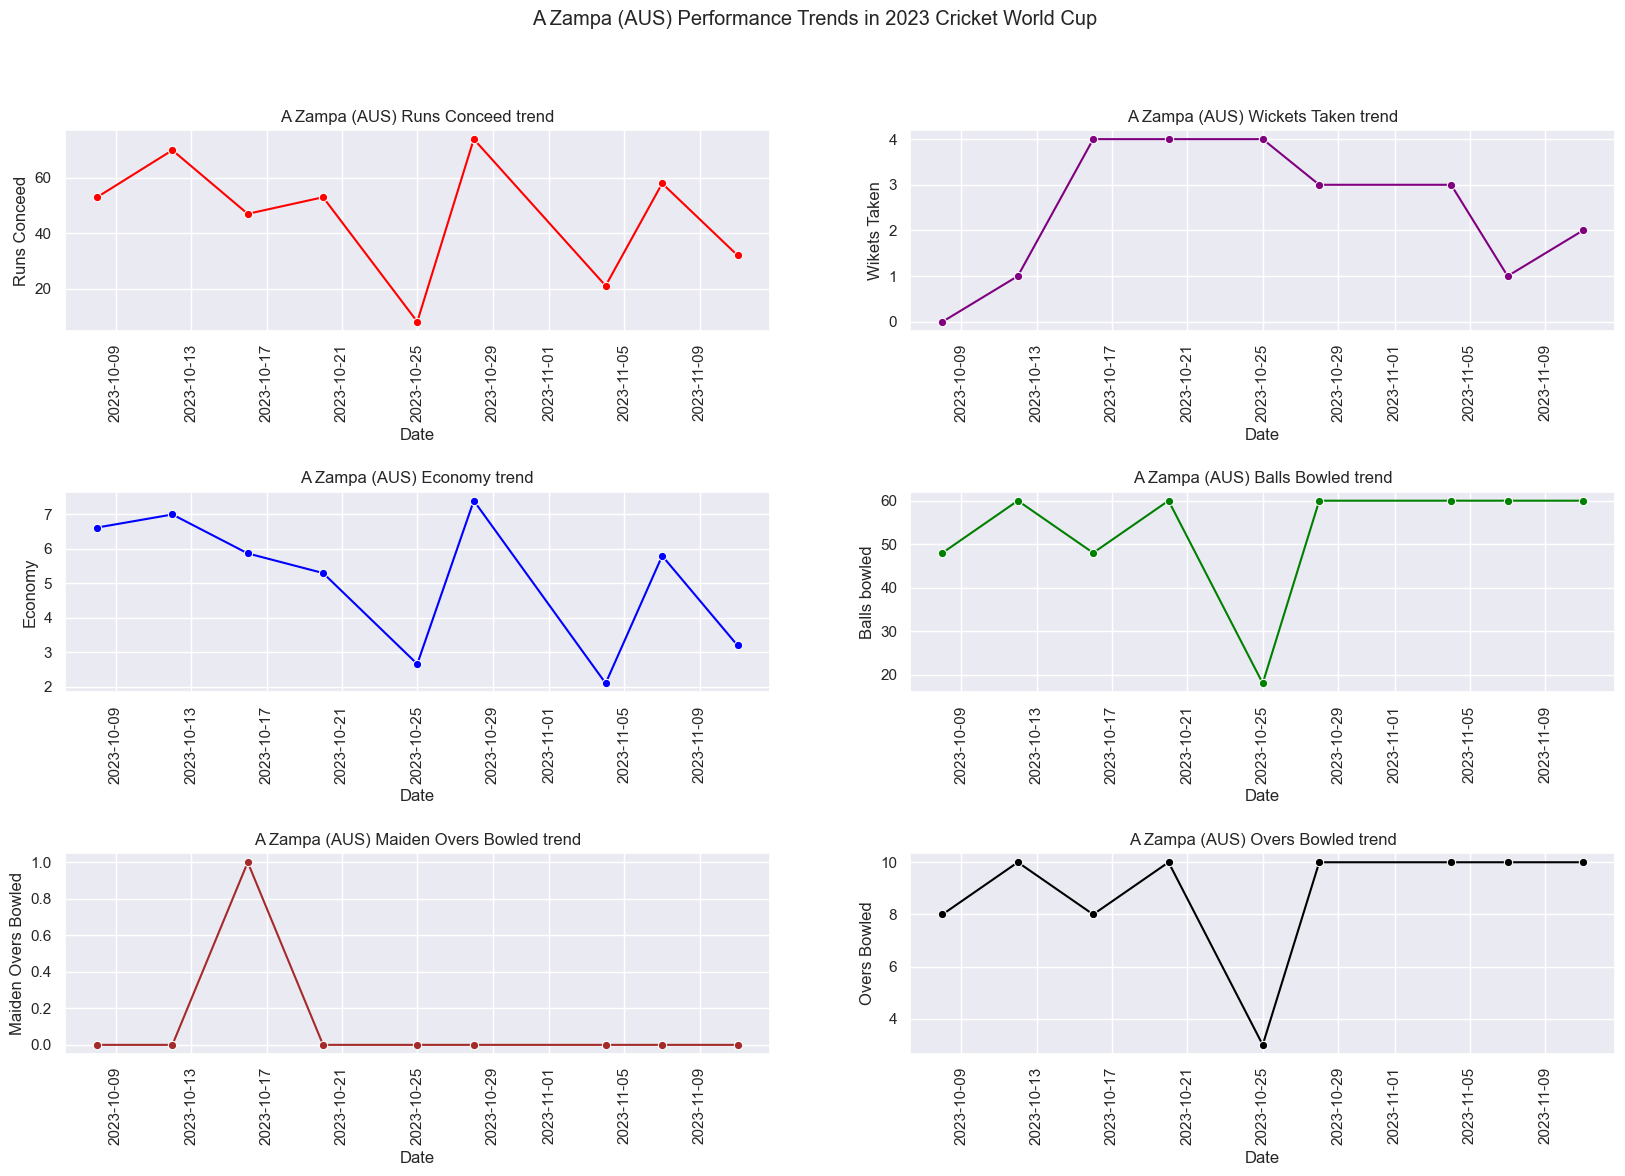

In [22]:
def plot_player_bowling_performance(wc_data, team_name, player_name):
    """
    Plots the bowling performance trends of a player in a specified team during a World Cup tournament.

    Parameters:
    - wc_data (DataFrame): DataFrame containing World Cup match data.
    - team_name (str): Name of the team (e.g., 'AUS' for Australia).
    - player_name (str): Name of the player to plot bowling performance for.

    Returns:
    - None: Displays a plot showing the bowling performance trends (Runs Conceded, Wickets Taken, Economy, Balls Bowled)
      of the specified player.
    """
    bowler = wc_data[wc_data['bat_or_bowl'] == 'bowl'].groupby(['team', 'opposition', 'player'])[['runs', 'wkts', 'econ', 'bb_bf', 'mdns', 'overs', 'start_date']].first().reset_index()
    bowler['start_date'] = pd.to_datetime(bowler['start_date'])

    filtered_data = bowler[bowler['team'] == team_name][['player', 'runs', 'wkts', 'econ', 'bb_bf', 'mdns', 'overs', 'start_date']].sort_values('start_date')

    player_data = filtered_data[filtered_data['player'] == player_name][['runs', 'wkts', 'econ', 'bb_bf', 'mdns', 'overs', 'start_date']].sort_values('start_date')

    fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
    sns.set_context('notebook')
    sns.set_style('darkgrid')
    plt.subplots_adjust(hspace=.8)

    def plot_data(axis, x_data, y_data, color, y_label, title):
        sns.lineplot(x=x_data, y=y_data, color=color, marker='o', ax=axis)
        axis.set_xticks(axis.get_xticks())
        axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
        axis.set(xlabel='Date')
        axis.set(ylabel=y_label)
        axis.set(title=title)
        axis.grid(True)

    plot_data(ax0, player_data['start_date'], player_data['runs'], 'red', 'Runs Conceed', f'{player_name} Runs Conceed trend')
    plot_data(ax1, player_data['start_date'], player_data['wkts'], 'purple', 'Wikets Taken', f'{player_name} Wickets Taken trend')
    plot_data(ax2, player_data['start_date'], player_data['econ'], 'blue', 'Economy', f'{player_name} Economy trend')
    plot_data(ax3, player_data['start_date'], player_data['bb_bf'], 'green', 'Balls bowled', f'{player_name} Balls Bowled trend')
    plot_data(ax4, player_data['start_date'], player_data['mdns'], 'brown', 'Maiden Overs Bowled', f'{player_name} Maiden Overs Bowled trend')
    plot_data(ax5, player_data['start_date'], player_data['overs'], 'black', 'Overs Bowled', f'{player_name} Overs Bowled trend')
    
    plt.suptitle(f'{player_name} Performance Trends in 2023 Cricket World Cup')
    plt.show()

plot_player_bowling_performance(wc_data, 'AUS', 'A Zampa (AUS)') # Change here to see stats

C:\Users\cloud\AppData\Local\Temp\ipykernel_14216\297745765.py:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wc_data['start_date'] = pd.to_datetime(wc_data['start_date'])


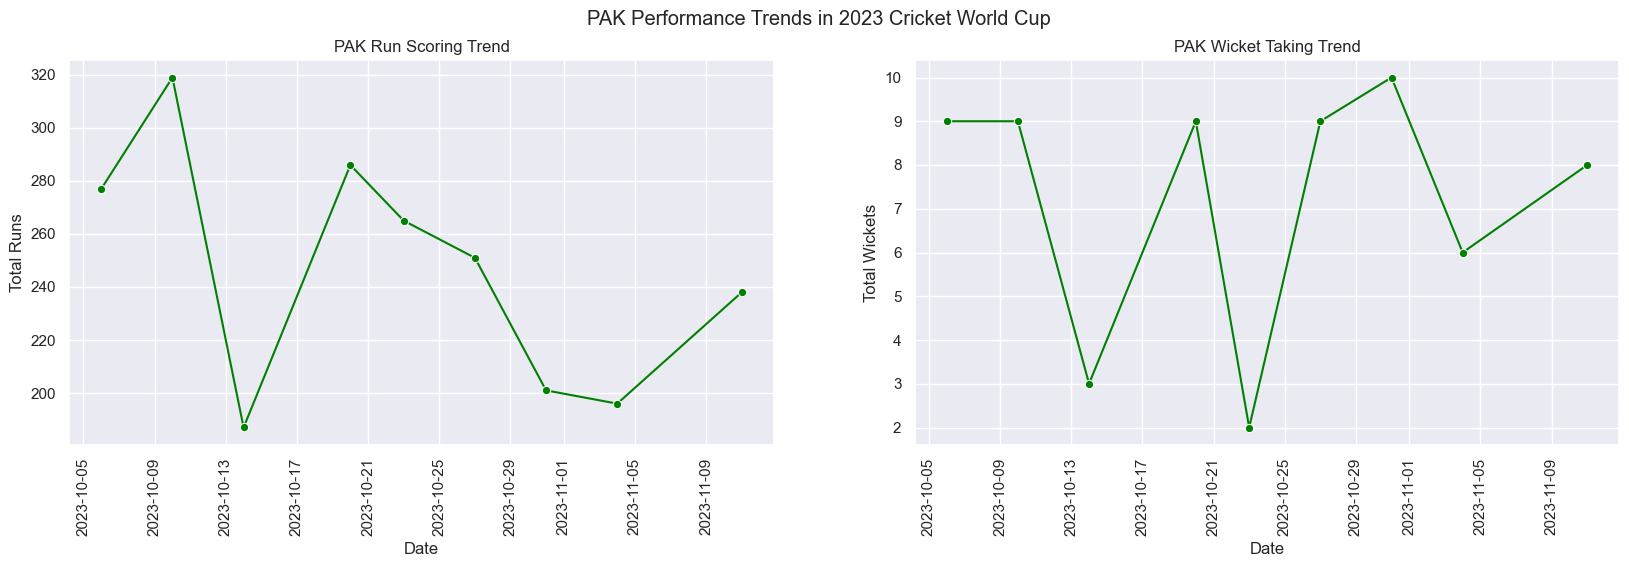

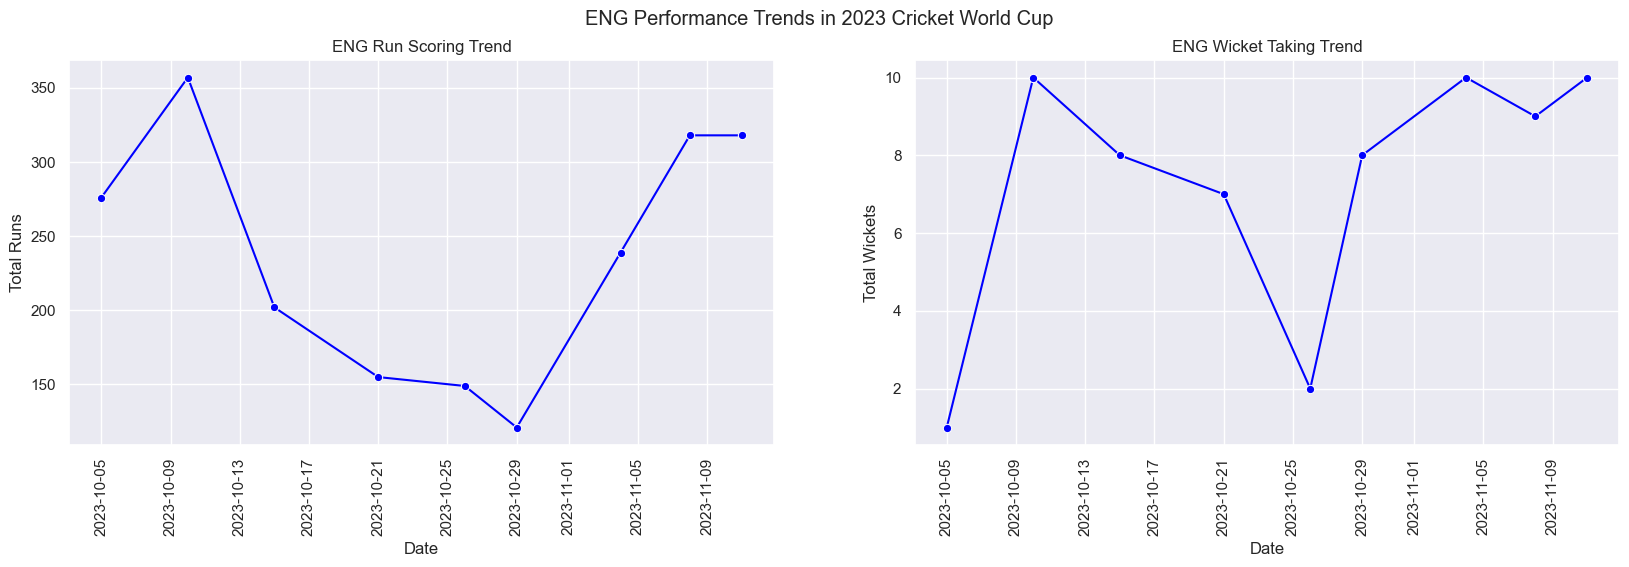

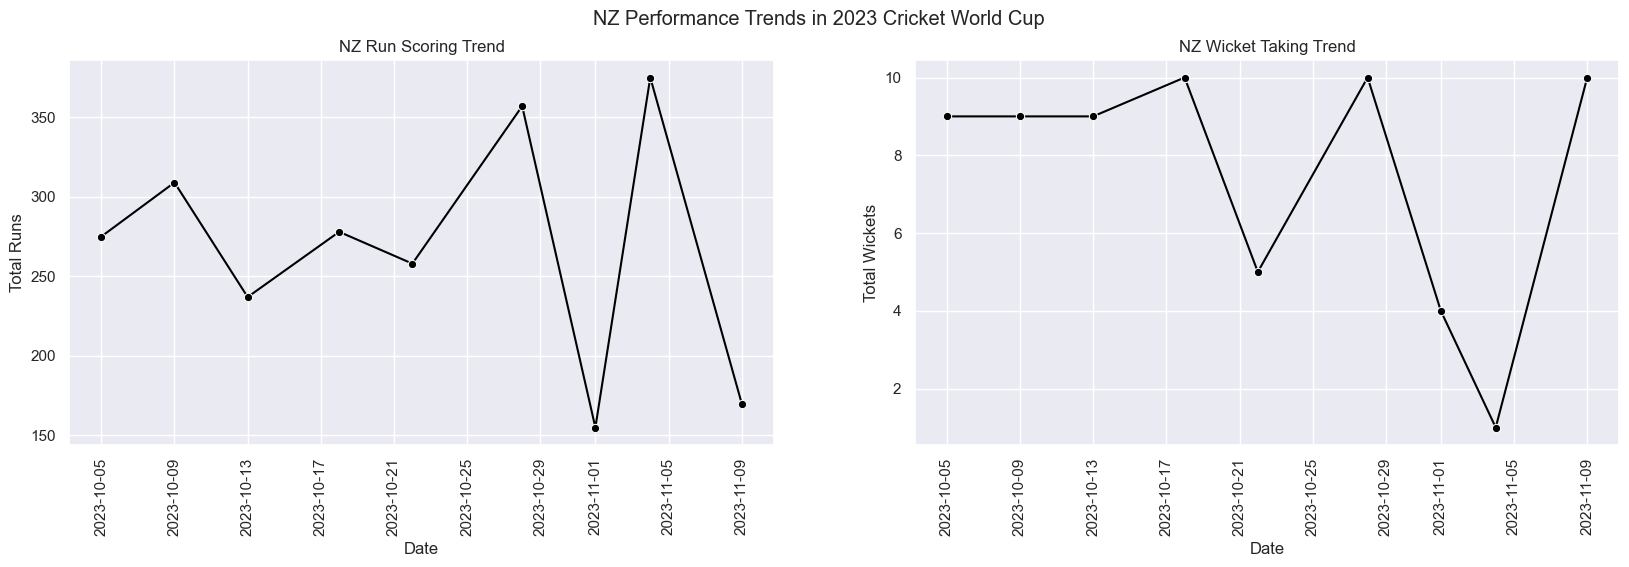

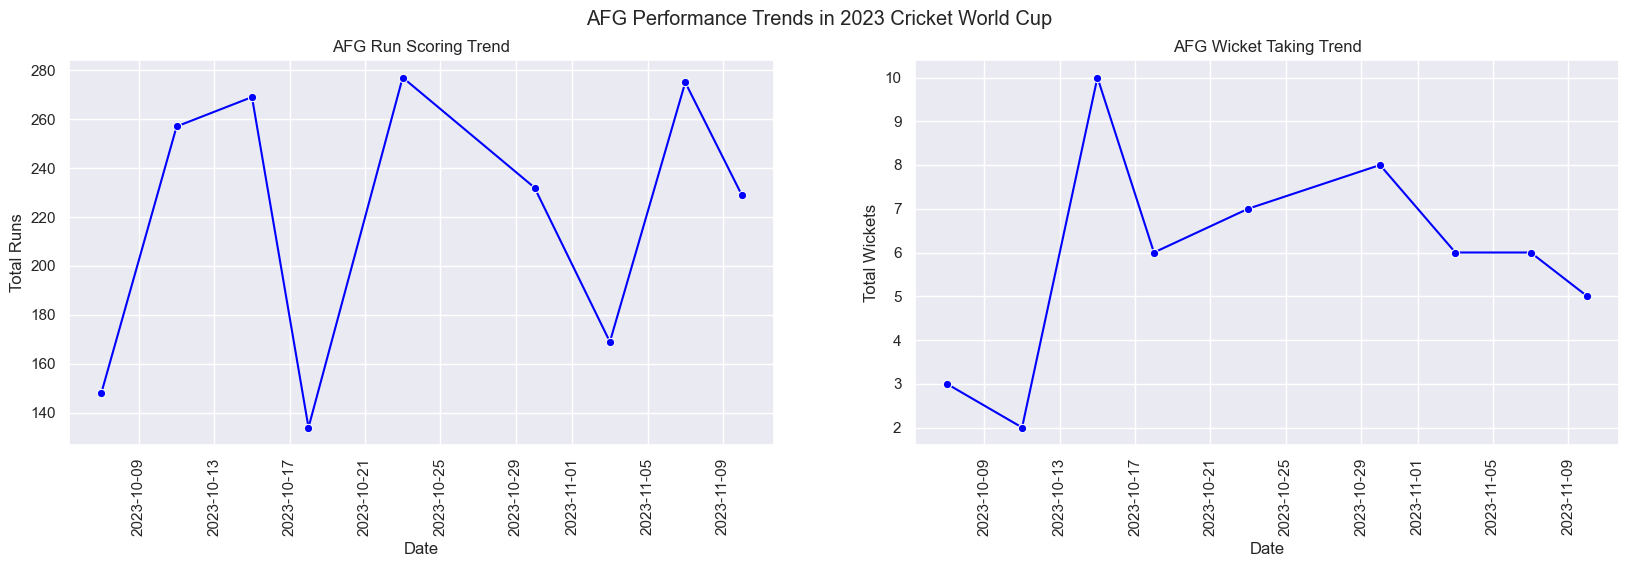

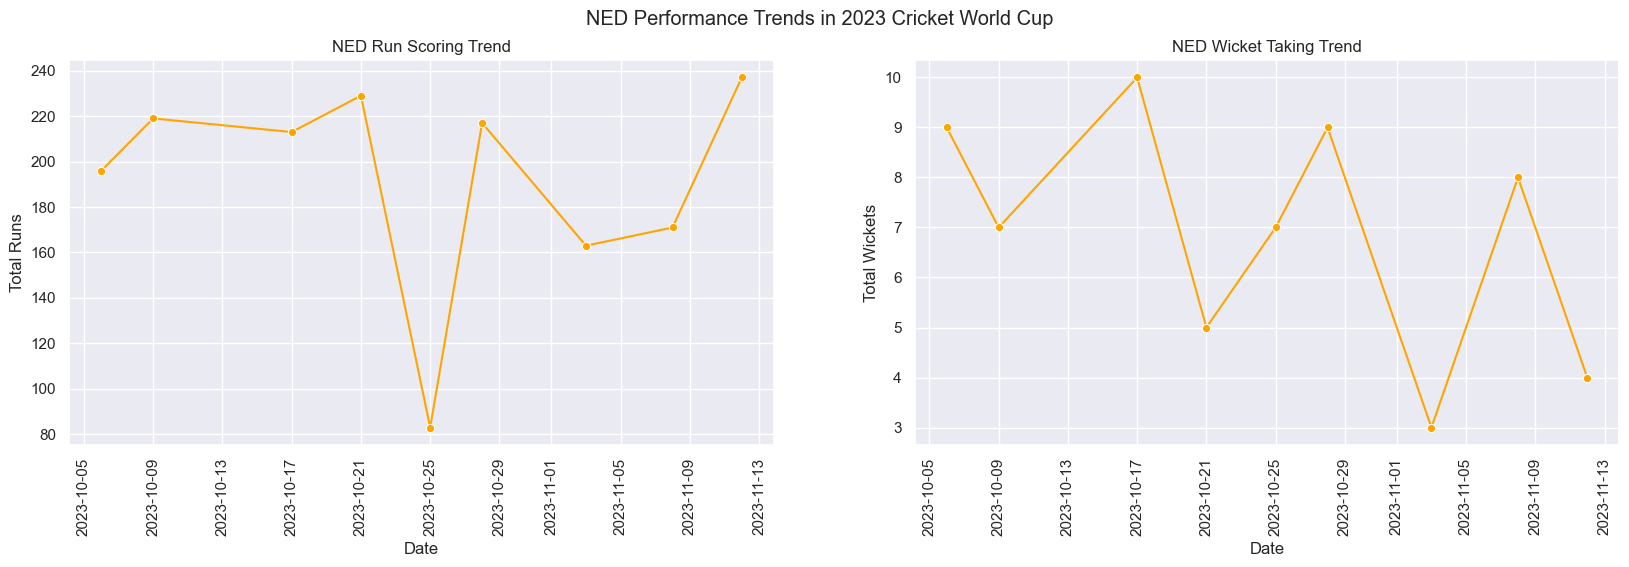

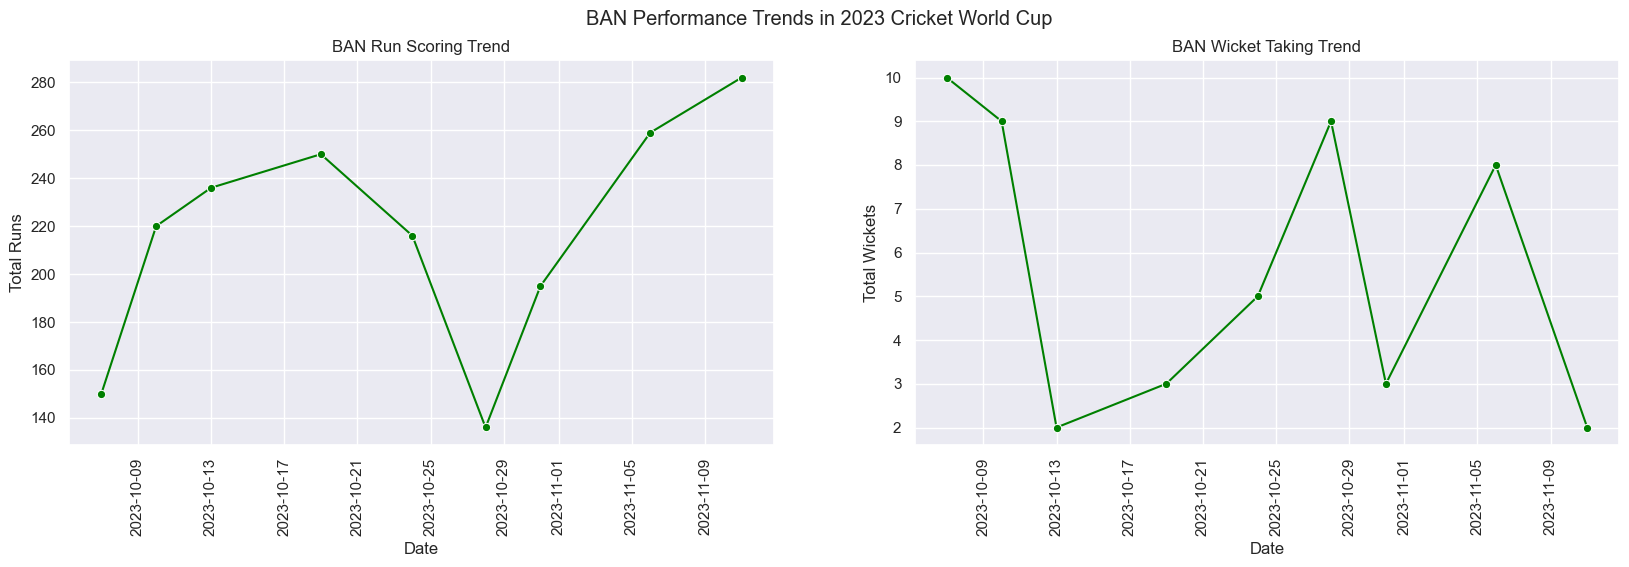

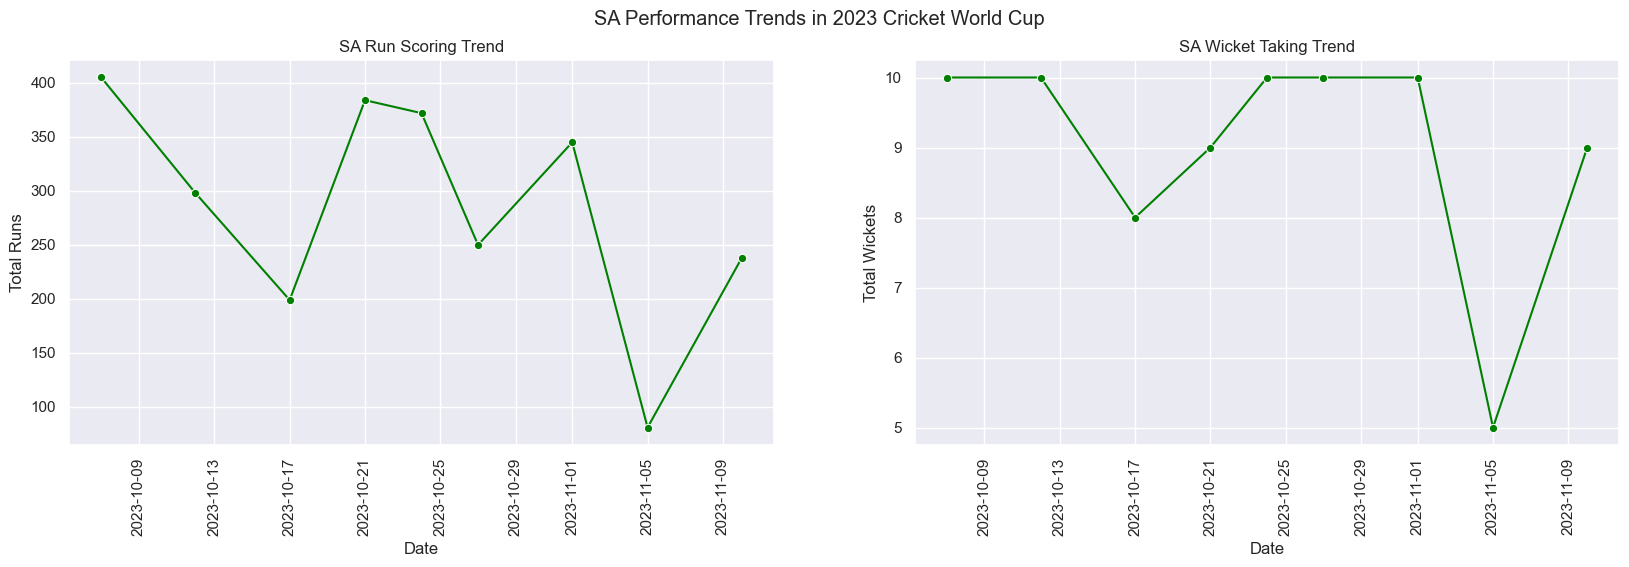

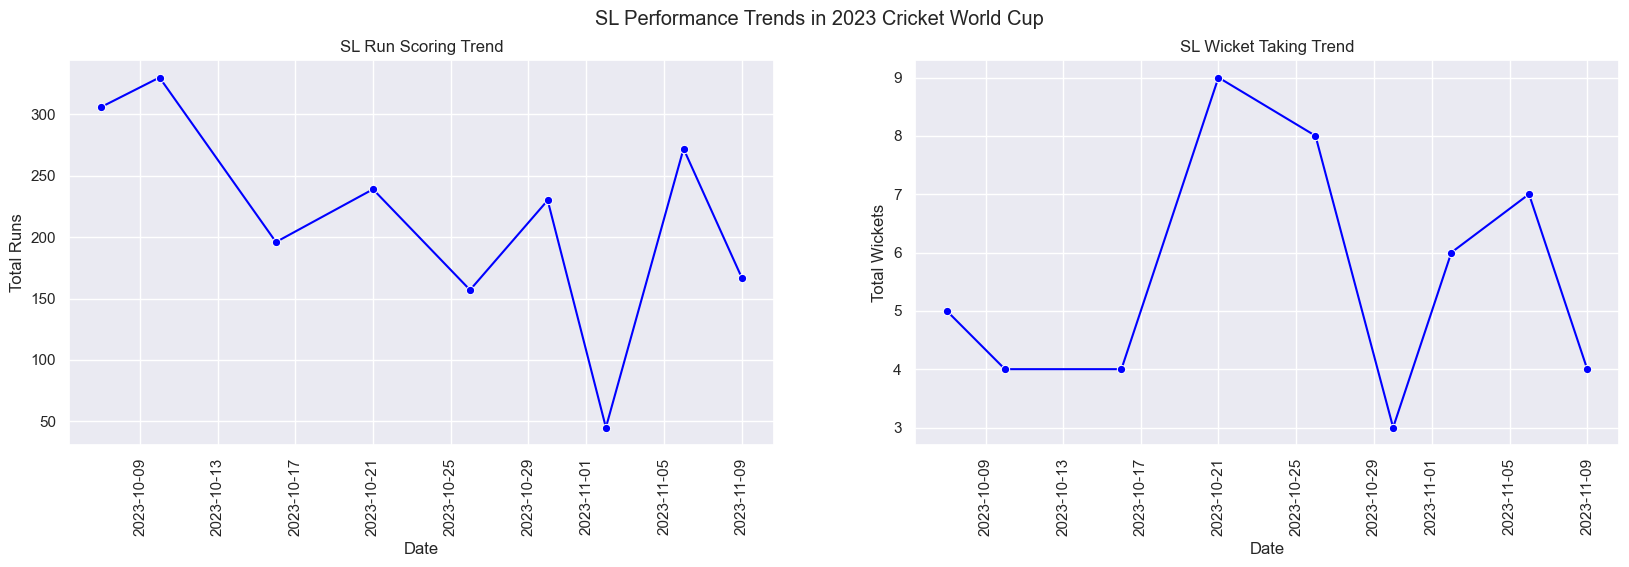

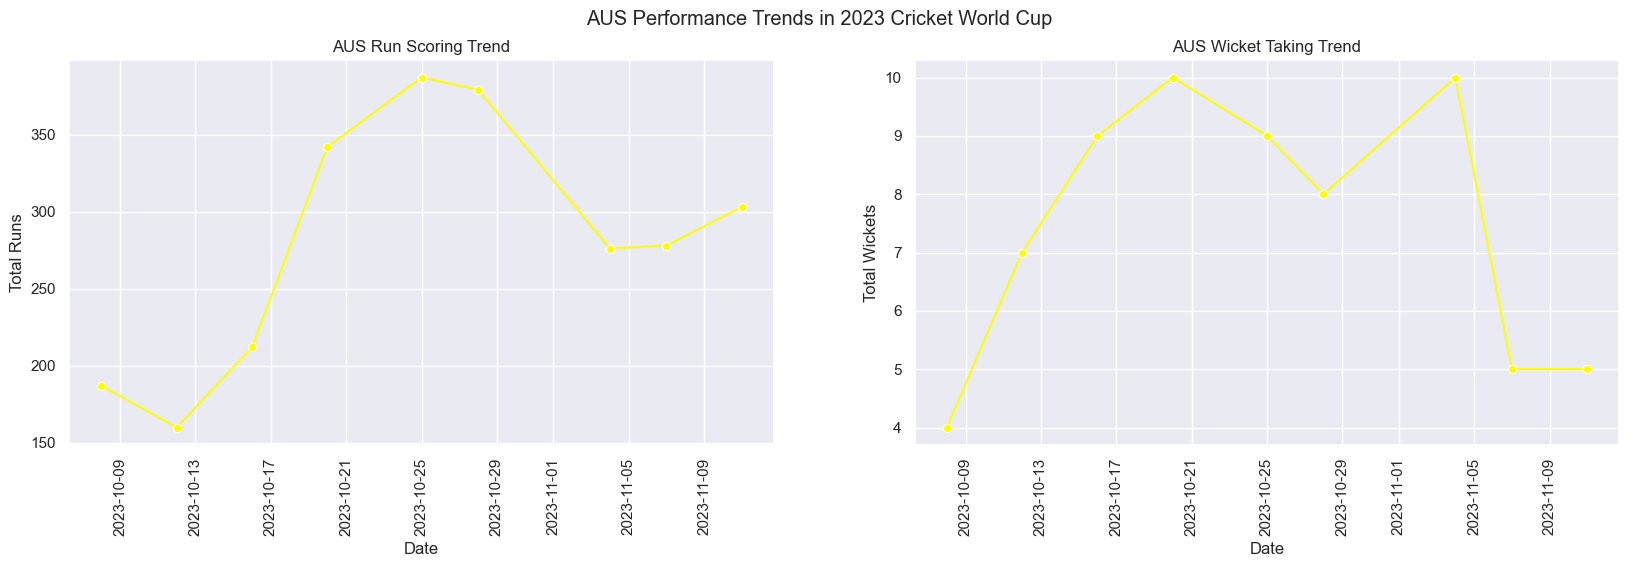

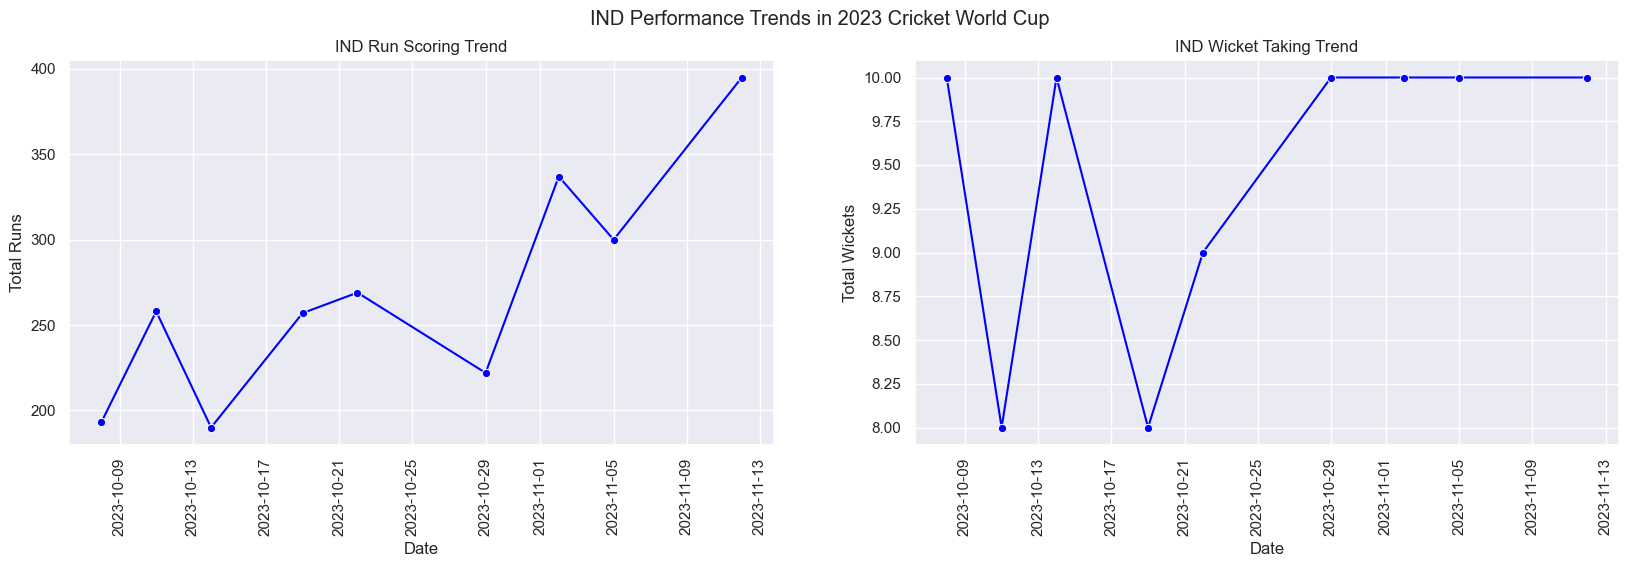

In [23]:
# 4.3: 
# Runs Scored Over Time: Plotting the runs scored by teams over different matches can show their performance trends.
# Wickets Taken Over Time: Similar to runs, you can visualize the wickets taken by teams across matches or years.

# Function to plot the performance trends of a team
def plot_performance(team, batting_data, bowling_data):
    """
    Plots the performance trends of a team in terms of runs scored and wickets taken over time.

    Parameters:
    team (str): The name of the team.
    batting_data (DataFrame): Data containing runs scored by the team over time.
    bowling_data (DataFrame): Data containing wickets taken by the team over time.
    """
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    sns.set_style('darkgrid')
    sns.set_context('notebook')

    # Plot runs scored over time
    sns.lineplot(x='start_date', y='runs', data=batting_data, color=team_colors[team], marker='o', ax=ax0)
    ax0.set(title=f'{team} Run Scoring Trend', xlabel='Date', ylabel='Total Runs')
    ax0.set_xticks(ax0.get_xticks())
    ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90)
    ax0.grid(True)

    # Plot wickets taken over time
    sns.lineplot(x='start_date', y='wkts', data=bowling_data, color=team_colors[team], marker='o', ax=ax1)
    ax1.set(title=f'{team} Wicket Taking Trend', xlabel='Date', ylabel='Total Wickets')
    ax1.set_xticks(ax1.get_xticks())
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.grid(True)

    plt.suptitle(f'{team} Performance Trends in 2023 Cricket World Cup')
    plt.show()

# Function to analyze team performance (runs and wickets)
def analyze_team_performance(team_data):
    """
    Analyzes the performance of a team in terms of runs scored and wickets taken over time.

    Parameters:
    team_data (DataFrame): Data containing team-wise performance details.

    Returns:
    batting_data (DataFrame): Data containing runs scored by the team over time.
    bowling_data (DataFrame): Data containing wickets taken by the team over time.
    """
    batting_data = team_data[team_data['bat_or_bowl'] == 'bat'].groupby(['start_date'])[['runs']].sum().reset_index()
    bowling_data = team_data[team_data['bat_or_bowl'] == 'bowl'].groupby(['start_date'])[['wkts']].sum().reset_index()

    return batting_data, bowling_data

# Convert start_date column to datetime format
wc_data['start_date'] = pd.to_datetime(wc_data['start_date'])

# Get unique team names
teams = wc_data['team'].unique()

# Iterate through each team and plot their performance trends
for team in teams:
    # Filter data for the current team
    team_data = wc_data[wc_data['team'] == team]
    
    # Analyze batting and bowling performance for the team
    batting, bowling = analyze_team_performance(team_data)
    
    # Plot performance trends for the current team
    plot_performance(team, batting, bowling)